In [1]:
from os.path import join

import numpy as np
from numpy.fft import fft2, ifft2

import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.rcParams['font.size'] = 18

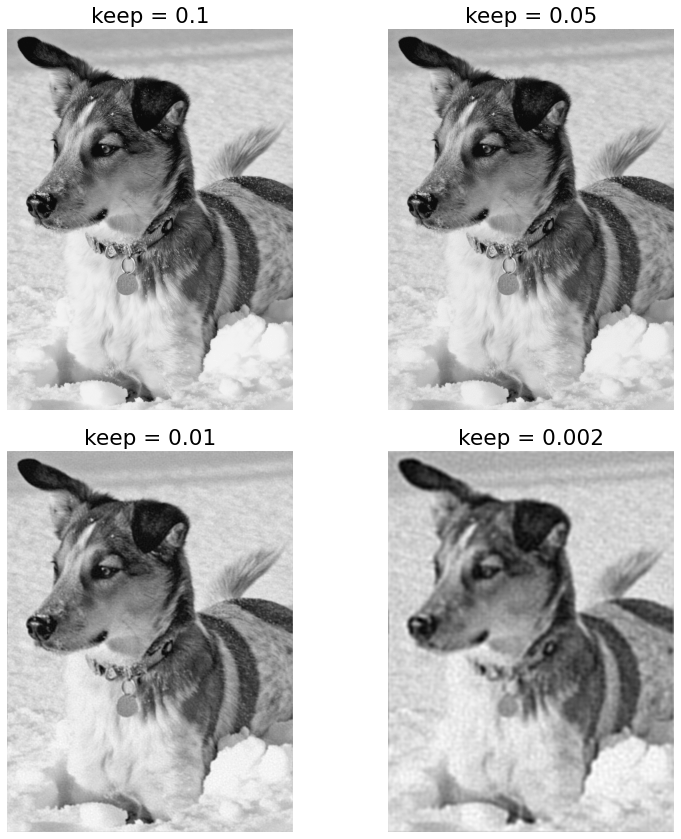

In [2]:
# Read image and convert to grayscale
A = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=2)

A_t = fft2(A)
A_t_sorted = np.sort(abs(A_t.ravel())) # sort by magnitude

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
keeps = [0.1, 0.05, 0.01, 0.002]

# Zero out all small coefficients and inverse transform
for ax, keep in zip(axs.flat, keeps):
    thresh = A_t_sorted[int(np.floor((1 - keep) * len(A_t_sorted)))]
    ind = np.abs(A_t) > thresh   # Find small indices
    A_t_low = A_t * ind          # Threshold small indices
    A_low = ifft2(A_t_low).real  # Compressed image
    ax.imshow(A_low, cmap='gray')
    ax.axis(False)
    ax.set_title(f'keep = {keep}')
plt.tight_layout()